In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = 6 * np.random.rand(100,1)-3
y = 0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)

Text(0, 0.5, 'y Dataset')

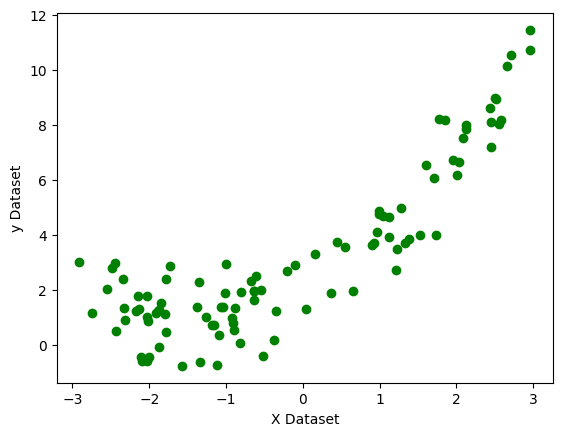

In [6]:
plt.scatter(X,y,color='green')
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
## Let's implement Linear Regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score

score = r2_score(y_test,lr.predict(X_test))

print(score)

0.5804754524890471


Text(0, 0.5, 'y Dataset')

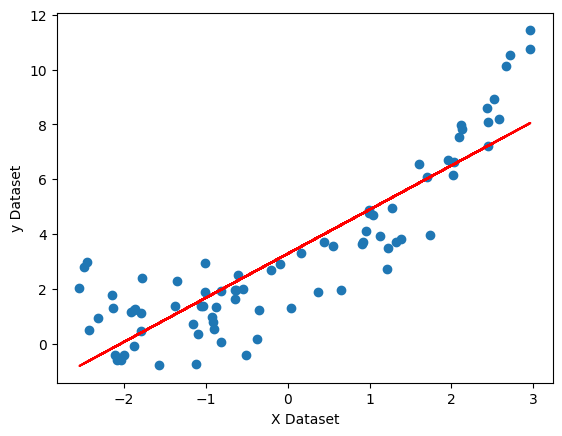

In [12]:
## Let's Visualize this model

plt.plot(X_train,lr.predict(X_train),color='red')
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel('y Dataset')

In [13]:
## Lets apply Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred = lr.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)


0.8656441181778106


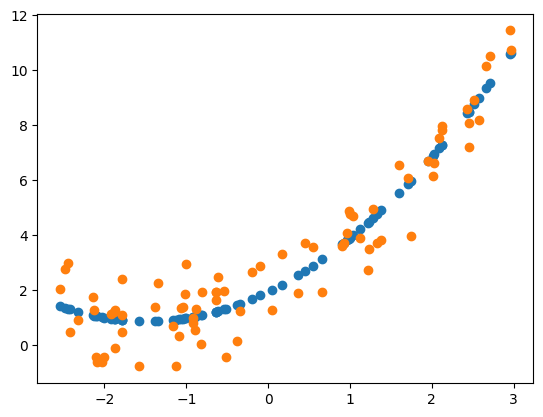

In [18]:
plt.scatter(X_train,lr.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred = lr.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)


0.8562265711307667


In [22]:
# Predicting new data points
X_new  = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)


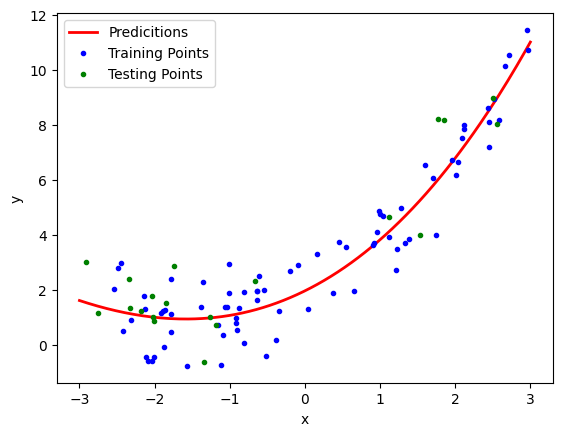

In [23]:
y_new = lr.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label='Predicitions')
plt.plot(X_train,y_train,"b.",label='Training Points')
plt.plot(X_test,y_test,"g.",label='Testing Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Pipeline Concepts


In [25]:
from sklearn.pipeline import Pipeline

In [28]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    X_new_poly = poly.transform(X_new)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features',poly_features),
        ('lin_reg',lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    # Plotting the prediction  line
    plt.plot(X_new,y_pred_new,'r',label='Degree'+str(degree),linewidth=2)
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()    
    
    
    

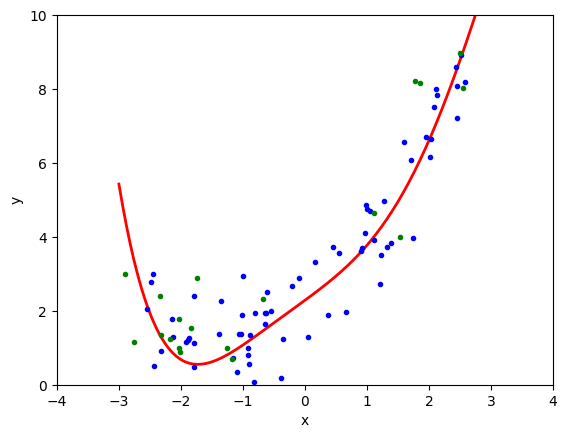

In [39]:
poly_regression(5)